Olistic Comapany, Data is stored in PostgreSQL

# **Download the data from kaggle**

First we will install kaggle python library in the colab notebook

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!ls -a

.  ..  .config	sample_data


Make .kaggle folder in the /content folder of colab

In [ ]:
!mkdir .kaggle

Below you have to provide your kaggle user name and kaggle API key.  Follow these instructions to create an API key: http://bit.ly/kaggle-creds


In [ ]:
import json
kaggle_username = input('Enter Kaggle username:')
kaggle_apikey = input('Enter Kaggle API key:')
token = {"username":kaggle_username,"key":kaggle_apikey}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

Enter Kaggle username:growithpriya
Enter Kaggle API key:54669aa05b2f0eff5e625dcef205926e


In [ ]:
!chmod 600 /content/.kaggle/kaggle.json

In [ ]:
# this will give an error the first time you run it but that is no issues
# just run and then run the below cell
!kaggle config set -n path -v{/content}

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!cp /content/.kaggle/kaggle.json /root/.kaggle/kaggle.json

In [ ]:
!cd ~ 

In [ ]:
!pwd

/content


In [ ]:
!kaggle datasets download -d olistbr/brazilian-ecommerce -p /content

 59% 25.0M/42.6M [00:00<00:00, 140MB/s] 
100% 42.6M/42.6M [00:00<00:00, 163MB/s]


In [ ]:
!unzip \*.zip

Archive:  brazilian-ecommerce.zip
  inflating: olist_customers_dataset.csv  
  inflating: olist_geolocation_dataset.csv  
  inflating: olist_order_items_dataset.csv  
  inflating: olist_order_payments_dataset.csv  
  inflating: olist_order_reviews_dataset.csv  
  inflating: olist_orders_dataset.csv  
  inflating: olist_products_dataset.csv  
  inflating: olist_sellers_dataset.csv  
  inflating: product_category_name_translation.csv  


Now the datasets will be available in the /content folder of colab

# **Business and Data Understanding**

**Business Understanding**

This is a real-world dataset coming from the brazilian ecommerce company Olist.
 
Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners. See more on our website: www.olist.com

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

Attention
* An order might have multiple items.
* Each item might be fulfilled by a distinct seller.
* All text identifying stores and partners where replaced by the names of Game of Thrones great houses.

**Data Schema and Understanding** 

The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers.

The data is divided in multiple datasets for better understanding and organization. Please refer to the following data schema when working with it:

![](https://drive.google.com/uc?export=view&id=1Wyr2o4YCtdo5USupfTioipApit-Ui9Cw)

# **Problem Statements**

The notebook will present 4 goals of analysis to help more understand about Olist performance as below, more or less almost all ecommerce businesses have to solve these use cases:

**Goal 1. Business Overview**

**Goal 2. Peak time of Sales**

**Goal 3. Orders'Delivery Performance**

**Goal 4. Customer Segmentation Analysis using RFM methodology**

# **Data Import, Preparation and Basic Analysis**

## Data Import

1. import neccessary liberary
2. read csv

A1. Import neccessary liberary

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

A2. Read csv files

In [ ]:
file_name ={'orders':'olist_orders_dataset', 'order_items':'olist_order_items_dataset', 'products':'olist_products_dataset',
            'eng_product_cate':'product_category_name_translation','customers': 'olist_customers_dataset','sellers': 'olist_sellers_dataset',
            'payments':'olist_order_payments_dataset', 'reviews':'olist_order_reviews_dataset', 'geolocation':'olist_geolocation_dataset'}
dataframes_dict = {}
for name in file_name.keys():
    dataframes_dict[name] = pd.read_csv(file_name[name]+'.csv')

## Data Understanding

Evaluate the data in dataset (columns, NaN value...)

In [ ]:
###list down all datasets###
dataset_name = file_name.keys()
dataset_name

dict_keys(['orders', 'order_items', 'products', 'eng_product_cate', 'customers', 'sellers', 'payments', 'reviews', 'geolocation'])

In [ ]:
###list down all columns in dataset###
df_columns_name= pd.DataFrame([dataframes_dict[i].columns for i in dataset_name], index = dataset_name).T
df_columns_name

,orders,order_items,products,eng_product_cate,customers,sellers,payments,reviews,geolocation
0,order_id,order_id,product_id,product_category_name,customer_id,seller_id,order_id,review_id,geolocation_zip_code_prefix
1,customer_id,order_item_id,product_category_name,product_category_name_english,customer_unique_id,seller_zip_code_prefix,payment_sequential,order_id,geolocation_lat
2,order_status,product_id,product_name_lenght,None,customer_zip_code_prefix,seller_city,payment_type,review_score,geolocation_lng
3,order_purchase_timestamp,seller_id,product_description_lenght,None,customer_city,seller_state,payment_installments,review_comment_title,geolocation_city
4,order_approved_at,shipping_limit_date,product_photos_qty,None,customer_state,None,payment_value,review_comment_message,geolocation_state
5,order_delivered_carrier_date,price,product_weight_g,None,None,None,None,review_creation_date,None
6,order_delivered_customer_date,freight_value,product_length_cm,None,None,None,None,review_answer_timestamp,None
7,order_estimated_delivery_date,None,product_height_cm,None,None,None,None,None,None
8,None,None,product_width_cm,None,None,None,None,None,None


Below we are showing how to get number of NaNs value, number of unique values and data type of each column of the dataset `order_items`. We will get all this information into a new dataframe

In [ ]:
df_order_items = dataframes_dict['order_items']

print(df_order_items.nunique())   # number of unique values in each column
print(df_order_items.dtypes)      # data type of each columns
print(df_order_items.isna().sum()*100/len(df_order_items)) # number of NaNs value in each column

df1_order_items = pd.DataFrame([df_order_items.nunique(), df_order_items.dtypes, \
                                df_order_items.isna().sum()*100/len(df_order_items)], index=['unique_entries','dtype','NaN_pt(%)'])

df1_order_items


order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object
order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
unique_entries,98666,21,32951,3095,93318,5968,6999
dtype,object,int64,object,object,object,float64,float64
NaN_pt(%),0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df1_order_items_transposed = df1_order_items.T
df1_order_items_transposed

,unique_entries,dtype,NaN_pt(%)
order_id,98666,object,0.0
order_item_id,21,int64,0.0
product_id,32951,object,0.0
seller_id,3095,object,0.0
shipping_limit_date,93318,object,0.0
price,5968,float64,0.0
freight_value,6999,float64,0.0


In [ ]:
# in the above dataset column names are indexes we will convert it into a column
df1_order_items_transposed.reset_index(inplace = True)
df1_order_items_transposed

,index,unique_entries,dtype,NaN_pt(%)
0,order_id,98666,object,0.0
1,order_item_id,21,int64,0.0
2,product_id,32951,object,0.0
3,seller_id,3095,object,0.0
4,shipping_limit_date,93318,object,0.0
5,price,5968,float64,0.0
6,freight_value,6999,float64,0.0


In [ ]:
df1_order_items_transposed['dataset'] = 'order_items'
df1_order_items_transposed

,index,unique_entries,dtype,NaN_pt(%),dataset
0,order_id,98666,object,0.0,order_items
1,order_item_id,21,int64,0.0,order_items
2,product_id,32951,object,0.0,order_items
3,seller_id,3095,object,0.0,order_items
4,shipping_limit_date,93318,object,0.0,order_items
5,price,5968,float64,0.0,order_items
6,freight_value,6999,float64,0.0,order_items


This is how the data should look like for each dataset but it is not feasible to do this again and again for each dataset, so below we have created a function which will take all the datasets and do this analysis in one go.

In [ ]:
### Define which datasets using in this scope and study about their columns###
pd.set_option('precision', 2)
dataset_list = ['orders','order_items', 'products', 'eng_product_cate', 'customers','reviews','sellers']

# define a function to get basic info (unique entries, %NaN value, dtype) of each column in the dataset 
def dataset_info(df, df_name):
    df1 = pd.DataFrame([df.nunique(), df.dtypes, df.isna().sum()*100/len(df)], index=['unique_entries','dtype','NaN_pt(%)']).T
    df1.reset_index(inplace = True)
    df1['dataset_name'] = df_name
    return df1

#define a function to highlight NaN_pt(%) > 0:
def highlight_NaN(x):
    return ['color:darkblue;background-color:pink' if v > 0 else '' for v in x]

#use loop for to go through all using datasets
df_dataset_info = pd.DataFrame()
for dataset in dataset_list: 
    df2 = dataset_info(dataframes_dict[dataset], dataset)
    df_dataset_info = df_dataset_info.append(df2)

df_dataset_info.reset_index(drop=True, inplace=True)

# .style method applies the styling function 
df_dataset_format = df_dataset_info.style.apply(highlight_NaN, subset=pd.IndexSlice[:, ["NaN_pt(%)"]])
df_dataset_format

,index,unique_entries,dtype,NaN_pt(%),dataset_name
0,order_id,99441,object,0.00,orders
1,customer_id,99441,object,0.00,orders
2,order_status,8,object,0.00,orders
3,order_purchase_timestamp,98875,object,0.00,orders
4,order_approved_at,90733,object,0.16,orders
5,order_delivered_carrier_date,81018,object,1.79,orders
6,order_delivered_customer_date,95664,object,2.98,orders
7,order_estimated_delivery_date,459,object,0.00,orders
8,order_id,98666,object,0.00,order_items
9,order_item_id,21,int64,0.00,order_items


**Conclusion:**

* Most of columns dont have much NaN value, except 2 columns: "review comment title" and "review comment message" in dataset "reviews"

## Data Preparation - Orders data

In [ ]:
### processing data in dataset: "orders" ###

#Add some timing columns for "orders" dataset (year, month, day of week, time of day...)

#define a function for time_period with:
#  Morning = 5:00 to before 12:00
#  Afternoon = 12:00 to before 17:00
#  Evening = 17:00 to before 21:00
#  Night = 21:00 to before 4:00

def time_period(x):
    if x>=5 and x<12:
        return "Morning"
    elif x>=12 and x<17:
        return "Afternoon"
    elif x>=17 and x<21:
        return "Evening"
    else:
        return "Night"

#get neccessary columns from "orders" dataset:
orders_df = dataframes_dict['orders'][['order_id','customer_id','order_status','order_purchase_timestamp','order_estimated_delivery_date',
                    'order_delivered_customer_date','order_delivered_carrier_date']]

#assign new columns about year, month, day of week, time of day...
orders_df = orders_df.assign(
    purchase_date = pd.to_datetime(orders_df['order_purchase_timestamp']).dt.date,
    purchase_year = pd.to_datetime(orders_df['order_purchase_timestamp']).dt.year,
    purchase_month = pd.to_datetime(orders_df['order_purchase_timestamp']).dt.month,
    purchase_MMYYYY= pd.to_datetime(orders_df['order_purchase_timestamp']).dt.strftime('%b-%y'),
    purchase_day = pd.to_datetime(orders_df['order_purchase_timestamp']).dt.day_name(),
    purchase_hour = pd.to_datetime(orders_df['order_purchase_timestamp']).dt.hour)

#apply the defined "time_period" function:
orders_df["purchase_time"]= orders_df["purchase_hour"].apply(time_period)

orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,order_delivered_customer_date,order_delivered_carrier_date,purchase_date,purchase_year,purchase_month,purchase_MMYYYY,purchase_day,purchase_hour,purchase_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18 00:00:00,2017-10-10 21:25:13,2017-10-04 19:55:00,2017-10-02,2017,10,Oct-17,Monday,10,Morning
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13 00:00:00,2018-08-07 15:27:45,2018-07-26 14:31:00,2018-07-24,2018,7,Jul-18,Tuesday,20,Evening
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04 00:00:00,2018-08-17 18:06:29,2018-08-08 13:50:00,2018-08-08,2018,8,Aug-18,Wednesday,8,Morning
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-15 00:00:00,2017-12-02 00:28:42,2017-11-22 13:39:59,2017-11-18,2017,11,Nov-17,Saturday,19,Evening
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-26 00:00:00,2018-02-16 18:17:02,2018-02-14 19:46:34,2018-02-13,2018,2,Feb-18,Tuesday,21,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-28 00:00:00,2017-03-17 15:08:01,2017-03-10 11:18:03,2017-03-09,2017,3,Mar-17,Thursday,9,Morning
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-03-02 00:00:00,2018-02-28 17:37:56,2018-02-07 23:22:42,2018-02-06,2018,2,Feb-18,Tuesday,12,Afternoon
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-27 00:00:00,2017-09-21 11:24:17,2017-08-28 20:52:26,2017-08-27,2017,8,Aug-17,Sunday,14,Afternoon
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-02-15 00:00:00,2018-01-25 23:32:54,2018-01-12 15:35:03,2018-01-08,2018,1,Jan-18,Monday,21,Night


order_status,approved,canceled,created,delivered,invoiced,processing,shipped,unavailable
purchase_year,,,,,,,,
2016,0.00,7.90,0.00,81.16,5.47,0.61,2.74,2.13
2017,0.00,0.59,0.01,96.29,0.39,0.53,1.18,1.01
2018,0.00,0.62,0.00,97.73,0.22,0.11,1.05,0.27


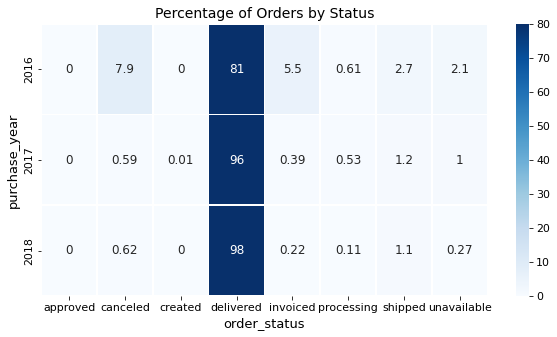

In [ ]:
###calculate %orders by status for each year###

#define function to format chart (re-use for further charts):
def format_chart(ax):
    ax.title.set_size(14)
    ax.xaxis.label.set_size(13)
    ax.yaxis.label.set_size(13)
    ax.tick_params(labelsize=11)

#create pivot table to count orders by status and year, replace NaN with 0:
ord_stt = orders_df.pivot_table(values = 'order_id', index='order_status'
                                , columns='purchase_year', aggfunc= 'count')
ord_stt.fillna(0, inplace=True)

#calculate %order by status for each year:
ord_stt = ord_stt.apply(lambda x: ((x*100)/x.sum()).round(2), axis=0).T

#format dataframe's caption, tbody, th:
styles = [dict(selector="caption",
            props=[("text-align", "center"),
                   ("font-size", "110%"),
                   ("color", 'darkblue'),
                  ("font-weight", "bold")]),
          dict(selector="tbody",
            props=[("color", 'darkblue')]),
         dict(selector="th",
            props=[("color", 'white'),
                  ('background-color','#6E7894')])]

ord_st=ord_stt.style.set_caption('Percentage of Orders by Status').set_table_styles(styles)

# present data to heatmap:
fig, ax = plt.subplots(figsize=(10,5))
ax=sns.heatmap(data=ord_stt, cmap='Blues', linecolor="white", linewidths=0.5, vmin=0, vmax=80, 
               annot=True, annot_kws={"size":12});
ax.set_title("Percentage of Orders by Status")

#call "format_chart_small" function to format chart:
format_chart(ax)
# set fontsize for cbar: use matplotlib.colorbar object, then set labelsize
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=11)
plt.savefig('Percentage of Orders by Status', dpi=400, bbox_inches='tight');

ord_st

**Conclusion:**
* It can be seen, for all reported years, percentage of orders under "delivered" status is  accounted for largest proportion (over 80%)

### Resized scope of work: 

Because more than 80% orders are under "delivered" status, and we cannot know clearly other status's meaning in Olist company, therefore, determine to analyze only "delivered" status in the scope of this analysis.
In this scope also consider "price" as revenue of the products (ignore freight value).

# **Goal analysis**

Before doing analysis, merge the neccessary datasets into 1 dataframe

In [ ]:
### Merging neccessary datasets for analysis ###

detail_df= (((dataframes_dict['order_items'].merge(orders_df, how="left",on='order_id'))
                 .merge(dataframes_dict['products'], how="left",on='product_id'))
            .merge(dataframes_dict['eng_product_cate'], how='left', on='product_category_name'))\
            .merge(dataframes_dict['customers'], how="left", on="customer_id")

# create a new column with condition: 
conditions = [(detail_df['purchase_day'] == 'Saturday'),(detail_df['purchase_day'] == 'Sunday')]
choices = ['weekends', 'weekends']
detail_df['weekday'] = np.select(conditions, choices, default='workdays')

#filter order_status == "delivered" (because only analyze delivered orders):
detail_df= detail_df[detail_df['order_status']=='delivered']

detail_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,weekday
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,650.0,28.0,9.0,14.0,cool_stuff,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,workdays
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,30000.0,50.0,30.0,40.0,pet_shop,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,workdays
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,3050.0,33.0,13.0,33.0,furniture_decor,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,weekends
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,200.0,16.0,10.0,15.0,perfumery,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,workdays
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,3750.0,35.0,40.0,30.0,garden_tools,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,weekends
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,...,10150.0,89.0,15.0,40.0,housewares,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,workdays
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,...,8950.0,45.0,26.0,38.0,computers_accessories,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,weekends
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,...,967.0,21.0,24.0,19.0,sports_leisure,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,workdays
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,...,100.0,20.0,20.0,20.0,computers_accessories,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,workdays


In [ ]:
#pick up neccessary columns for analysis:
products_df = detail_df[['order_id', 'product_id','price', 'order_status', 'purchase_date','purchase_MMYYYY', 'purchase_year','purchase_month','purchase_day','purchase_time','weekday','product_category_name_english', 'customer_unique_id', 'customer_state'
                         , 'order_delivered_customer_date', 'order_estimated_delivery_date','order_delivered_carrier_date','shipping_limit_date', 'seller_id']]

products_df

,order_id,product_id,price,order_status,purchase_date,purchase_MMYYYY,purchase_year,purchase_month,purchase_day,purchase_time,weekday,product_category_name_english,customer_unique_id,customer_state,order_delivered_customer_date,order_estimated_delivery_date,order_delivered_carrier_date,shipping_limit_date,seller_id
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,delivered,2017-09-13,Sep-17,2017,9,Wednesday,Morning,workdays,cool_stuff,871766c5855e863f6eccc05f988b23cb,RJ,2017-09-20 23:43:48,2017-09-29 00:00:00,2017-09-19 18:34:16,2017-09-19 09:45:35,48436dade18ac8b2bce089ec2a041202
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,delivered,2017-04-26,Apr-17,2017,4,Wednesday,Morning,workdays,pet_shop,eb28e67c4c0b83846050ddfb8a35d051,SP,2017-05-12 16:04:24,2017-05-15 00:00:00,2017-05-04 14:35:00,2017-05-03 11:05:13,dd7ddc04e1b6c2c614352b383efe2d36
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,delivered,2018-01-14,Jan-18,2018,1,Sunday,Afternoon,weekends,furniture_decor,3818d81c6709e39d06b2738a8d3a2474,MG,2018-01-22 13:19:16,2018-02-05 00:00:00,2018-01-16 12:36:48,2018-01-18 14:48:30,5b51032eddd242adc84c38acab88f23d
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,delivered,2018-08-08,Aug-18,2018,8,Wednesday,Morning,workdays,perfumery,af861d436cfc08b2c2ddefd0ba074622,SP,2018-08-14 13:32:39,2018-08-20 00:00:00,2018-08-10 13:28:00,2018-08-15 10:10:18,9d7a1d34a5052409006425275ba1c2b4
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,delivered,2017-02-04,Feb-17,2017,2,Saturday,Afternoon,weekends,garden_tools,64b576fb70d441e8f1b2d7d446e483c5,SP,2017-03-01 16:42:31,2017-03-17 00:00:00,2017-02-16 09:46:09,2017-02-13 13:57:51,df560393f3a51e74553ab94004ba5c87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,299.99,delivered,2018-04-23,Apr-18,2018,4,Monday,Afternoon,workdays,housewares,0c9aeda10a71f369396d0c04dce13a64,MA,2018-05-10 22:56:40,2018-05-18 00:00:00,2018-04-25 12:09:00,2018-05-02 04:11:01,b8bc237ba3788b23da09c0f1f3a3288c
112646,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,350.00,delivered,2018-07-14,Jul-18,2018,7,Saturday,Morning,weekends,computers_accessories,0da9fe112eae0c74d3ba1fe16de0988b,PR,2018-07-23 20:31:55,2018-08-01 00:00:00,2018-07-17 08:05:00,2018-07-20 04:31:48,f3c38ab652836d21de61fb8314b69182
112647,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,99.90,delivered,2017-10-23,Oct-17,2017,10,Monday,Evening,workdays,sports_leisure,cd79b407828f02fdbba457111c38e4c4,SP,2017-10-28 12:22:22,2017-11-10 00:00:00,2017-10-26 15:13:14,2017-10-30 17:14:25,c3cfdc648177fdbbbb35635a37472c53
112648,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,55.99,delivered,2017-08-14,Aug-17,2017,8,Monday,Night,workdays,computers_accessories,eb803377c9315b564bdedad672039306,SP,2017-08-16 21:59:40,2017-08-25 00:00:00,2017-08-15 19:02:53,2017-08-21 00:04:32,2b3e4a2a3ea8e01938cabda2a3e5cc79


Now, we start to analysis the first goal "Business Overview"

## **1. Business Overview**

In this part,we will learn about the overall Olist business on term of revenue, number of orders, order size (value of order), top product categories... for general assessment

### Revenue and Order Trend

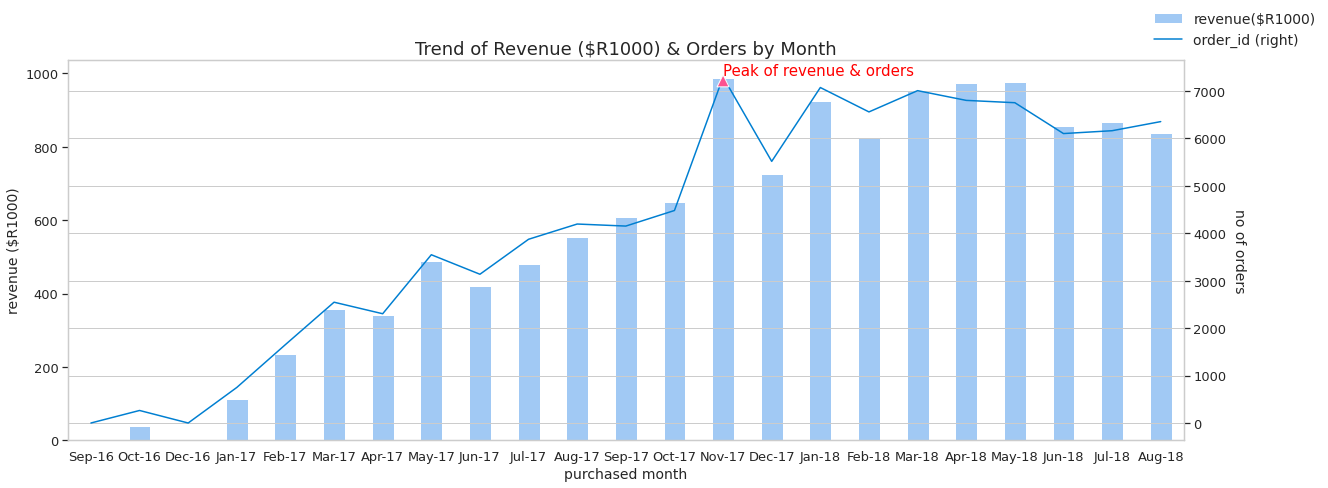

In [ ]:
### Order Trend by Month ###
#set theme for all charts:
plt.style.use("seaborn-whitegrid")
sns.set_theme(style="whitegrid", palette="pastel")

#define a function to format chart:
def format_chart_trend(ax):
    ax.title.set_size(22)
    ax.xaxis.label.set_size(17)
    ax.yaxis.label.set_size(17)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    
#create df order_M to calculate no of delivered orders by month:    
ord_M=products_df.pivot_table(values = ['order_id', 'price']
                              , index=['purchase_year','purchase_month','purchase_MMYYYY']
                              , aggfunc={'order_id':'nunique','price':'sum'})

#sort data by timing (for purchase_MMYYY col):
ord_M = ord_M.sort_index(ascending=[1,1,1])
ord_M.reset_index(inplace = True)
del ord_M['purchase_year']
del ord_M['purchase_month']
ord_M.set_index('purchase_MMYYYY', inplace=True)
ord_M['revenue($R1000)']=ord_M['price']/1000
del ord_M['price']

#present data to line chart:
width = .45
fig = plt.figure()
ax1 = ord_M['revenue($R1000)'].plot(kind='bar', figsize=(20,7), width = width)
ax2 = ord_M['order_id'].plot(secondary_y=True, color='#007FD1')
ax1.set(ylabel='revenue ($R1000)')
ax1.set(title="Trend of Revenue ($R1000) & Orders by Month", xlabel="purchased month")
ax1.title.set_size(18)
ax1.xaxis.label.set_size(14)
ax1.yaxis.label.set_size(14)
ax1.xaxis.set_tick_params(labelsize=13)
ax1.yaxis.set_tick_params(labelsize=13)
ax2.yaxis.label.set_size(14)
ax2.yaxis.set_tick_params(labelsize=13)
ax2.set_ylabel('no of orders', rotation=-90, labelpad=20) 
fig.legend(loc='upper right', fontsize=14)

#annotation of the peak point:
from datetime import datetime
peak = 'Peak of revenue & orders'
ax2.annotate(peak, xy=(13, 7289+50),
             xytext=(13, 7289 + 300),fontsize=15, color='red',
             arrowprops=dict(facecolor='#FC5190',shrink=0.05),
             horizontalalignment='left', verticalalignment='top')
plt.savefig('Trend of Revenue ($R1000) & Orders by Month', dpi=400, bbox_inches='tight');

In [ ]:
#8M2018 yoy growth:
products_8M=products_df[products_df['purchase_year'].isin([2017,2018])]
products_8M=products_8M[products_8M['purchase_month']<=8]
products_8M['revenue($R1000)']=products_8M['price']/1000
products_8M=products_8M.pivot_table(values='revenue($R1000)', columns='purchase_year', aggfunc ='sum')
products_8M.reset_index(inplace=True)
products_8M['%Growth']=(products_8M[2018]/products_8M[2017]-1)*100


products_8M.set_index('index',inplace=True)

products_8M.columns.names = ['']
products_8M.index.names = ['']
# print(products_8M.columns)
# print(products_8M.index.names)

product_8M_style = products_8M.style.applymap(
    lambda x: 'color:darkblue;background-color:pink' if x==products_8M.iloc[0,2] else '')
product_8M_style

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,2017,2018,%Growth
,,,
revenue($R1000),2993.46,7218.13,141.13


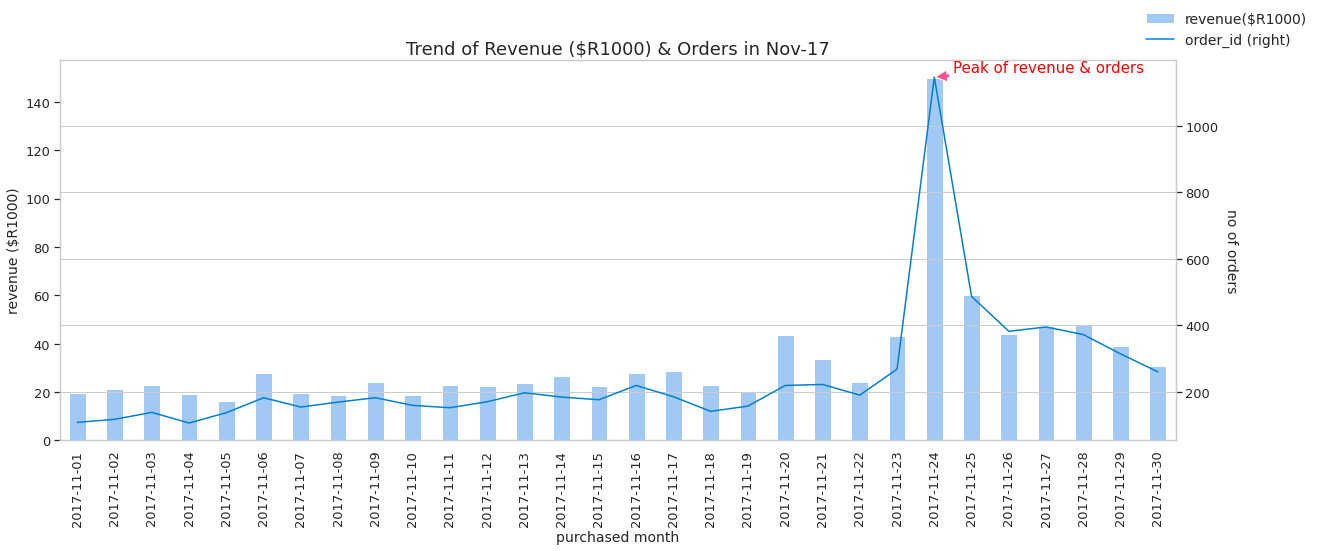

In [ ]:
### Order Trend in Nov-17 ###
#because Nov-17 has the highest revenue and orders, we dig down the data by date in Nov-17 to see the reason
#set theme for all charts:
plt.style.use("seaborn-whitegrid")
sns.set_theme(style="whitegrid", palette="pastel")

#define a function to format chart:
def format_chart_trend(ax):
    ax.title.set_size(22)
    ax.xaxis.label.set_size(17)
    ax.yaxis.label.set_size(17)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    
#create df order_M to calculate no of delivered orders by month:    
ord_Nov=products_df[products_df['purchase_MMYYYY']== 'Nov-17'].pivot_table(values = ['order_id', 'price']
                              , index=['purchase_date']
                              , aggfunc={'order_id':'nunique','price':'sum'})

#change purchase_date to str to draw column, line chart:
ord_Nov.sort_index(ascending=True, inplace=True)
ord_Nov.reset_index(inplace = True)
ord_Nov = ord_Nov.astype({"purchase_date": str}, errors='raise') 
ord_Nov.set_index('purchase_date', inplace=True)
ord_Nov['revenue($R1000)']=ord_Nov['price']/1000
#del ord_Nov['price']
ord_Nov
#present data to line chart:
width = .45
fig = plt.figure(figsize=(20,7))
ax1 = ord_Nov['revenue($R1000)'].plot(kind='bar',width = width)
ax2 = ord_Nov['order_id'].plot(kind='line',secondary_y=True, color='#007FD1')
ax1.set(ylabel='revenue ($R1000)')
ax1.set(title="Trend of Revenue ($R1000) & Orders in Nov-17", xlabel="purchased month")
ax1.title.set_size(18)
ax1.xaxis.label.set_size(14)
ax1.yaxis.label.set_size(14)
ax1.xaxis.set_tick_params(labelsize=13, rotation=90)
ax1.yaxis.set_tick_params(labelsize=13)

ax2.yaxis.label.set_size(14)
ax2.yaxis.set_tick_params(labelsize=13)
ax2.set_ylabel('no of orders', rotation=-90, labelpad=20) 
fig.legend(loc='upper right', fontsize=14)

#annotation of the peak point:
peak = 'Peak of revenue & orders'
ax2.annotate(peak, xy=(23, 1147),
             xytext=(23+0.5, 1147 + 50),fontsize=15, color='red',
             arrowprops=dict(facecolor='#FC5190',shrink=0.05),
             horizontalalignment='left', verticalalignment='top')
plt.savefig('Trend of Revenue ($R1000) & Orders in Nov-17', dpi=400, bbox_inches='tight');

**Conclusion:**
* Revenue and no of orders sold of Olist business grow up well from Q3-2017 and reached the peak at Nov-17.
* Compared revenue 8M2018 with 8M2017, the growth rate is more than 140%. It is the rapid growth.
* In Nov-17, 11/24/2017 is the highest revenue date due to Black Friday.

=> Can conclude that Olist business is the upgrowing business with the speed of growth is fast and business will get the peak in special sale date (like Black Friday). Thus, in the special sale days, Olist needs to care about the traffic to their site, delivery performance. Retailers also need to care about their stocks, packaging process.

### Daily Orders and Order Size (Order Value)

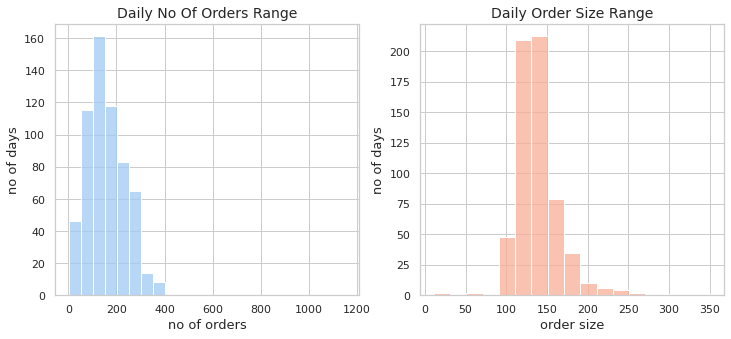

In [ ]:
### Daily Orders and Order Size Range ###
#summarize no of orders, revenue, order size by date:
ord_daily = products_df.pivot_table(values=["order_id","price"], index=['purchase_date','weekday']
                                ,aggfunc={"order_id":'nunique', "price":"sum"})
ord_daily['order_size'] = ord_daily['price']/ord_daily['order_id']


#present data to charts:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.histplot(ax=ax[0], data=ord_daily, x="order_id", binwidth=50)
ax[0].set(title='Daily No Of Orders Range', ylabel='no of days', xlabel='no of orders')

sns.histplot(ax=ax[1], data=ord_daily, x="order_size", binwidth=20, color='#F9AE96')
ax[1].set(title='Daily Order Size Range', ylabel='no of days', xlabel='order size')

format_chart(ax[0])
format_chart(ax[1])
plt.savefig('Daily Orders Range', dpi=400, bbox_inches='tight');

**Conclusion:**

* Daily no of orders are running in the large range up to 1,200 orders per day. 
* However, the most common no of orders purchased in a day is from 50 to 200 orders.
* Daily order size mostly is from "R$120" to "R$160".

### By top product category

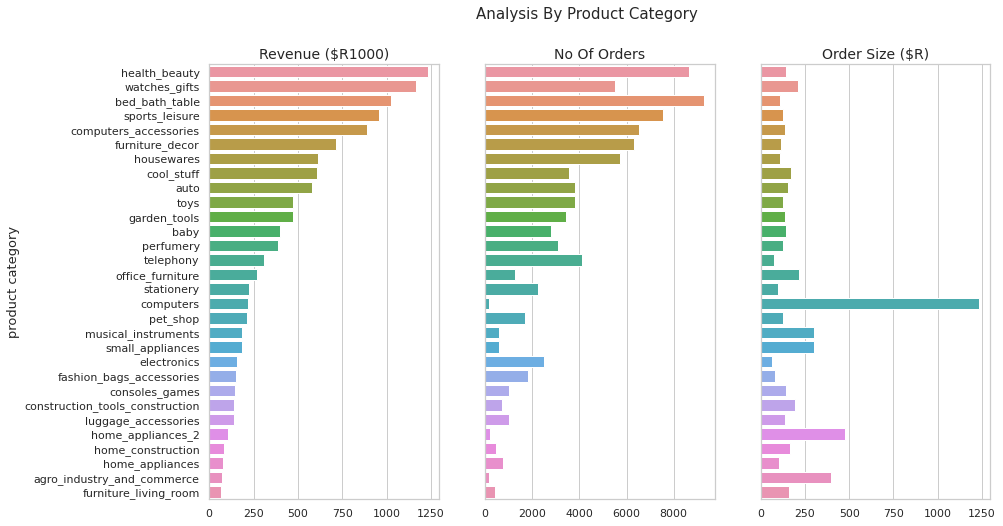

In [ ]:
###Top 30 product categories ###

#calculate revenue, no of orders, order size by top product categories:
prod_cat=products_df.pivot_table(values=['price', 'order_id'], index=['product_category_name_english']
                          , aggfunc={'price': 'sum', 'order_id': 'nunique'})
prod_cat["ord_size($R)"]=prod_cat["price"]/prod_cat["order_id"]
prod_cat["price"]=prod_cat["price"]/1000
prod_cat.sort_values(by='price', ascending = False, inplace = True)
prod_cat_top=prod_cat.rename(columns={'order_id':'no_of_order','price':"revenue($R1000)"}).head(30)

#present data to bar plots:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 8), sharey=True)
fig.suptitle('Analysis By Product Category', fontsize=15)

sns.barplot(ax=ax[0], x='revenue($R1000)', y= prod_cat_top.index, data = prod_cat_top)
ax[0].set_title('Revenue ($R1000)')
ax[0].set_ylabel('product category')

sns.barplot(ax=ax[1], x='no_of_order', y = prod_cat_top.index, data = prod_cat_top)
ax[1].set_title('No Of Orders')

sns.barplot(ax=ax[2], x='ord_size($R)', y = prod_cat_top.index, data = prod_cat_top)
ax[2].set_title('Order Size ($R)')

for i in range(0,3):
    ax[i].set(xlabel=None)

for i in range(1,3):
    ax[i].set(ylabel=None)

#call defined function "format_chart_small" to format charts:
format_chart(ax[0])
format_chart(ax[1])
format_chart(ax[2])
plt.savefig('Analysis By Product Category', dpi=400, bbox_inches='tight');

**Conclusion:**

* Top 5 categories bring revenue are: health/beauty, watches/gifts, bed/bath/table, sports/leisure & computer/accessories
* Order size of these top categories is not high (just around "$R200").
* It means that Olist revenue doesn’t come from expensive products, it is from large volumes of order sold rather than.

## **2. Peak Time of sale**

To understand which day and time having great order sold.
So that both Olist and retailers can optimize their business strategy like considering suitable time to launch promotion campaign or new products.

Note:
* Morning = 5:00 to before 12:00
* Afternoon = 12:00 to before 17:00
* Evening = 17:00 to before 21:00
* Night = 21:00 to before 4:00

### Analyze Order By Day and Time

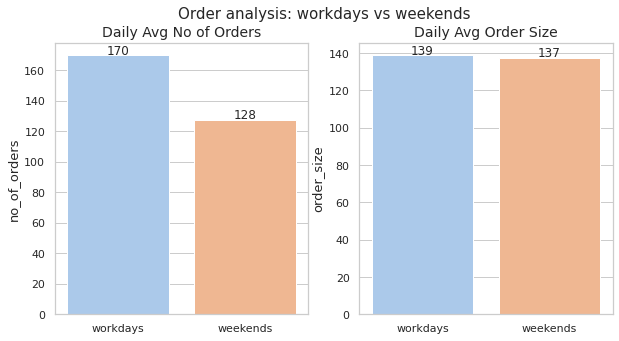

In [ ]:
###Daily Avg Orders and PO Size of workdays vs weekends###
#calculate avg daily no of orders and order size by workdays & weekends
ord_wd = ord_daily.pivot_table(values=['order_id','order_size'], index='weekday', aggfunc='mean')
ord_wd=ord_wd.reindex(index= ['workdays', 'weekends'])

#present data to barplot:
fig, ax = plt.subplots(1,2, figsize=(10,5))
fig.suptitle("Order analysis: workdays vs weekends", fontsize=15)
sns.barplot(x=ord_wd.index, y='order_id', data=ord_wd, ax=ax[0])
ax[0].set(title="Daily Avg No of Orders", xlabel=None, ylabel="no_of_orders")

sns.barplot(x=ord_wd.index, y='order_size', data=ord_wd, ax=ax[1])
ax[1].set(title="Daily Avg Order Size", xlabel=None)

#annotation value in columns:
for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
    
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')

format_chart(ax[0])
format_chart(ax[1])
plt.savefig('Order analysis: workdays vs weekends', dpi=400, bbox_inches='tight');

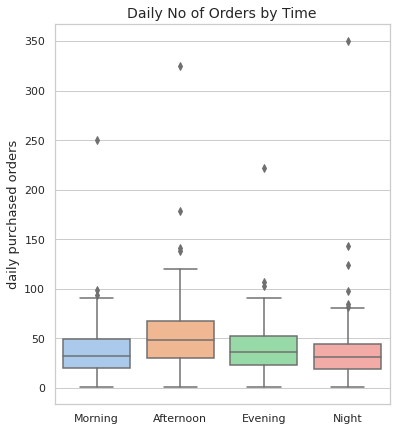

In [ ]:
### Daily no of orders by time ###
#count no of orders by date and time of day:
ord_time=products_df.pivot_table(values="order_id", index=['purchase_date','purchase_time'],aggfunc="nunique")
ord_time.reset_index(level="purchase_date", inplace=True)
ord_time.reset_index(level="purchase_time", inplace=True)

#present data to boxplot:
fig, ax = plt.subplots(figsize=(6,7))
sns.boxplot(data=ord_time, x="purchase_time", y="order_id",order=["Morning","Afternoon","Evening","Night"])
ax.set(title="Daily No of Orders by Time", xlabel=None, ylabel='daily purchased orders')
format_chart(ax)
plt.savefig('Daily No of Orders by Time', dpi=400, bbox_inches='tight');

**Conclusion:**

* Compared between workdays and weekends, order size is not different. However, no of orders daily has big difference. It presented that consumers purchased orders in workdays more than at weekends.
* By time of day, avg number of purchased orders in the afternoon is the highest, compared with other time.

### Analyze cross Day and Time

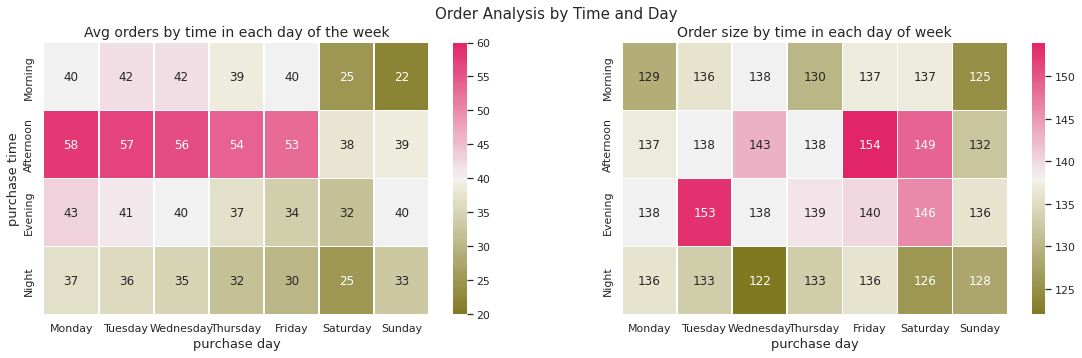

In [ ]:
### Avg orders, order size by day and time ### 

#caculate avg no of orders, order size by day, time:
ord_daytime = products_df.pivot_table(values=["order_id","price"]
                                      , index=['purchase_date','purchase_day','purchase_time']
                                      ,aggfunc={"order_id":'nunique', "price":"sum"})
ord_daytime.fillna(0, inplace = True)
ord_daytime.reset_index(level=['purchase_date','purchase_day','purchase_time'], inplace=True)
ord_daytime["order_size"]=(ord_daytime["price"]/ord_daytime["order_id"])
ord_daytime.rename(columns={'order_id':'no_of_orders'}, inplace=True)

ord_daytime = ord_daytime.pivot_table(values=['no_of_orders','order_size'], index='purchase_time'
                                      , columns='purchase_day'
                                      , aggfunc='mean').astype(int)

#sort columns & index:
day_of_wk = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']
ord_daytime = ord_daytime.reindex(index= ['Morning', 'Afternoon','Evening','Night'])
ord_daytime = ord_daytime.reindex(columns= day_of_wk, level = 'purchase_day')

#create heatmap to present data:
cmap = sns.diverging_palette(80,0,90,50, as_cmap=True)
fig, ax = plt.subplots(1,2, figsize=(19,5))
fig.suptitle("Order Analysis by Time and Day", fontsize=15)

sns.heatmap(ord_daytime.iloc[:,:7], cmap=cmap, ax=ax[0], linecolor="white", vmin = 20, vmax = 60, linewidths=0.5
            , annot=True,annot_kws={"size":12})
ax[0].set_title('Avg orders by time in each day of the week')
ax[0].set(xlabel="purchase day")
ax[0].set(ylabel="purchase time")
ax[0].set_xticklabels(day_of_wk, rotation=360)

sns.heatmap(ord_daytime.iloc[:,7:], cmap=cmap, ax=ax[1],linecolor="white", linewidths=0.5
            , annot=True,annot_kws={"size":12},fmt='d')
ax[1].set_title("Order size by time in each day of week")
ax[1].set(ylabel=None, xlabel="purchase day")
ax[1].set_xticklabels(day_of_wk, rotation=360)

format_chart(ax[0])
format_chart(ax[1])

#set fontsize for cbar: use matplotlib.colorbar object, then set labelsize
cbar0 = ax[0].collections[0].colorbar
cbar0.ax.tick_params(labelsize=11)
cbar1 = ax[1].collections[0].colorbar
cbar1.ax.tick_params(labelsize=11)
plt.savefig('Order size by time in each day of week', dpi=400, bbox_inches='tight');

**Conclusion:**

* Dig down, the peak time that consumers are more likely to make orders is in the  afternoon of all weekdays, especially Monday to Wednesday.
* On the other hand, consumers consider to purchase high price products in the afternoon of Friday, Saturday and evening of Tuesday.

=> To sum up: the time that retailers can consider for promotion to increase sale volume or launch new products is in afternoon of workdays. However, if retailers consider for promoting high price products, Friday & Saturday’s afternoon may be ideal.

## **3. Order Delivery Performance**

Learn about the delivery performance of the company.

From there, give suggestion for Olist to optimize their delivery services.

### Average Delivered Days

In [ ]:
### prepare data support for analysis ###

#add new columns support for analysis
products_df = products_df.assign(
    order_delivered_customer_date = pd.to_datetime(products_df["order_delivered_customer_date"]).dt.date,
    order_delivered_carrier_date = pd.to_datetime(products_df["order_delivered_carrier_date"]).dt.date,
    order_estimated_delivery_date = pd.to_datetime(products_df["order_estimated_delivery_date"]).dt.date,
    shipping_limit_date = pd.to_datetime(products_df["shipping_limit_date"]).dt.date)

products_df = products_df.assign(delivered_days= (products_df['order_delivered_customer_date'] - products_df['purchase_date']).dt.days
                                 ,days_est_vs_deliver= (products_df['order_estimated_delivery_date'] - products_df['order_delivered_customer_date']).dt.days
                                 ,days_limit_vs_deliver_carrier= (products_df['shipping_limit_date'] - products_df['order_delivered_carrier_date']).dt.days)

products_df=products_df.assign(seller_to_carrier=np.where(products_df['days_limit_vs_deliver_carrier']<0,'late deliver to carrier','in time deliver to carrier'))

# create a column with condition: 
products_df['est_to_deliver'] = np.where(products_df['days_est_vs_deliver']<0, 'late deliver', 'on time deliver')

conditions = [(products_df['days_est_vs_deliver'] < -10),
              (products_df['days_est_vs_deliver'] <= -5),
              (products_df['days_est_vs_deliver'] < 0)]
choices = ['late over 10 days', 'late from 5 days to 10 days','late under 5 days']
products_df['est_to_deliver_detail'] = np.select(conditions, choices, default='on time deliver')

#merge with reviews dataset:
#in case, reviews dataset has 2 reviews by orders => get avg score for each order:
reviews_unique = dataframes_dict['reviews'].pivot_table(values='review_score', index='order_id', aggfunc = 'mean')
reviews_unique.reset_index(inplace=True)
products_df=products_df.merge(reviews_unique[['order_id','review_score']], how="left", on ='order_id')

#remove duplicated line for same products in 1 order:
#reason: if customers purchased 2 same products in 1 order, data presented as 2 lines with same delivery information,
#therefore need to remove duplicates before calculate deliver performance
deliver_df=products_df.drop_duplicates(keep=False,inplace=False)

#exam data if any data in col "order_delivered_customer_date", "order_delivered_carrier_date" is NaN
sum_nan = deliver_df.isna().sum()
sum_nan[sum_nan>0]

product_category_name_english    1322
order_delivered_customer_date       8
order_delivered_carrier_date        2
delivered_days                      8
days_est_vs_deliver                 8
days_limit_vs_deliver_carrier       2
review_score                      619
dtype: int64

In [ ]:
#remove if any data in col "order_delivered_customer_date", "order_delivered_carrier_date" is NaN
deliver_df=deliver_df.dropna(subset = ['order_delivered_customer_date','order_delivered_carrier_date'])
deliver_df

,order_id,product_id,price,order_status,purchase_date,purchase_MMYYYY,purchase_year,purchase_month,purchase_day,purchase_time,...,order_delivered_carrier_date,shipping_limit_date,seller_id,delivered_days,days_est_vs_deliver,days_limit_vs_deliver_carrier,seller_to_carrier,est_to_deliver,est_to_deliver_detail,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,delivered,2017-09-13,Sep-17,2017,9,Wednesday,Morning,...,2017-09-19,2017-09-19,48436dade18ac8b2bce089ec2a041202,7.0,9.0,0.0,in time deliver to carrier,on time deliver,on time deliver,5.0
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,delivered,2017-04-26,Apr-17,2017,4,Wednesday,Morning,...,2017-05-04,2017-05-03,dd7ddc04e1b6c2c614352b383efe2d36,16.0,3.0,-1.0,late deliver to carrier,on time deliver,on time deliver,4.0
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,delivered,2018-01-14,Jan-18,2018,1,Sunday,Afternoon,...,2018-01-16,2018-01-18,5b51032eddd242adc84c38acab88f23d,8.0,14.0,2.0,in time deliver to carrier,on time deliver,on time deliver,5.0
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,delivered,2018-08-08,Aug-18,2018,8,Wednesday,Morning,...,2018-08-10,2018-08-15,9d7a1d34a5052409006425275ba1c2b4,6.0,6.0,5.0,in time deliver to carrier,on time deliver,on time deliver,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,delivered,2017-02-04,Feb-17,2017,2,Saturday,Afternoon,...,2017-02-16,2017-02-13,df560393f3a51e74553ab94004ba5c87,25.0,16.0,-3.0,late deliver to carrier,on time deliver,on time deliver,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110192,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,299.99,delivered,2018-04-23,Apr-18,2018,4,Monday,Afternoon,...,2018-04-25,2018-05-02,b8bc237ba3788b23da09c0f1f3a3288c,17.0,8.0,7.0,in time deliver to carrier,on time deliver,on time deliver,5.0
110193,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,350.00,delivered,2018-07-14,Jul-18,2018,7,Saturday,Morning,...,2018-07-17,2018-07-20,f3c38ab652836d21de61fb8314b69182,9.0,9.0,3.0,in time deliver to carrier,on time deliver,on time deliver,5.0
110194,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,99.90,delivered,2017-10-23,Oct-17,2017,10,Monday,Evening,...,2017-10-26,2017-10-30,c3cfdc648177fdbbbb35635a37472c53,5.0,13.0,4.0,in time deliver to carrier,on time deliver,on time deliver,5.0
110195,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,55.99,delivered,2017-08-14,Aug-17,2017,8,Monday,Night,...,2017-08-15,2017-08-21,2b3e4a2a3ea8e01938cabda2a3e5cc79,2.0,9.0,6.0,in time deliver to carrier,on time deliver,on time deliver,5.0


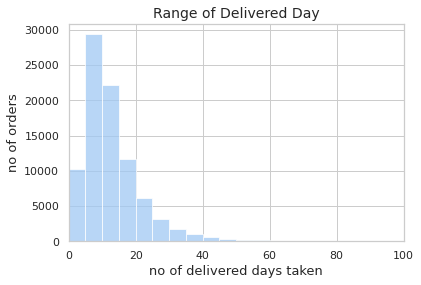

In [ ]:
###Range of delivered days###
#get unique order with its delivered day:
deliver_ord=deliver_df[['order_id','delivered_days']].drop_duplicates(keep=False)

#present data to the chart:
ax = sns.histplot(data=deliver_ord[['order_id','delivered_days']], x='delivered_days', binwidth=5)
ax.set(title='Range of Delivered Day', ylabel='no of orders', xlabel='no of delivered days taken')
ax.set_xlim(0,100)
format_chart(ax)
plt.savefig('Range of Delivered Day', dpi=400, bbox_inches='tight');

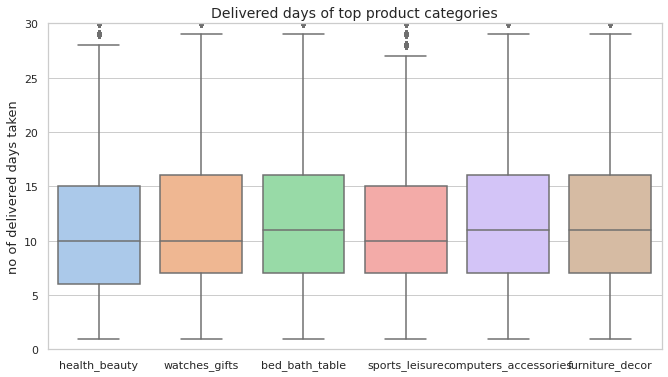

In [ ]:
###delivered days of top product categories###
#get unique order with its delivered day & categories:
deliver_uni_ord=deliver_df[['order_id','delivered_days','product_category_name_english']].drop_duplicates(keep=False)
deli_top_pro= deliver_uni_ord[deliver_uni_ord['product_category_name_english'].isin(['bed_bath_table', 'health_beauty', 'watches_gifts','sports_leisure','computers_accessories','furniture_decor'])]

#present data to boxplot:
fig, ax = plt.subplots(figsize=(11,6))
sns.boxplot(data=deli_top_pro, x="product_category_name_english", y="delivered_days",order=['health_beauty', 'watches_gifts','bed_bath_table','sports_leisure','computers_accessories','furniture_decor'])
ax.set(title="Delivered days of top product categories", xlabel=None, ylabel='no of delivered days taken')
ax.set_ylim(0,30)
format_chart(ax)
plt.savefig('Delivered days of top product categories', dpi=400, bbox_inches='tight');

**Conclusion:**

* Range of delivered day is running up to 100 days due to some outliners. 
* However, most of orders are delivered in range 5 – 15 days from ordered date.
* Dig down by top categories, there is not big difference on delivered days, still around 5 – 15 days.

### Actual Delivery vs Estimation

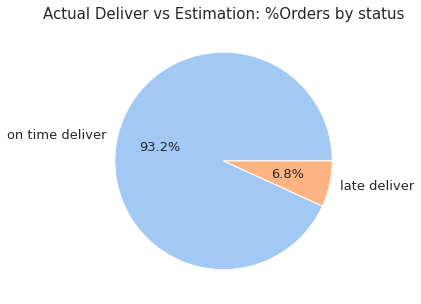

In [ ]:
###Deliver vs estimation###
#calculate no of orders by days variance bw estimation to actual deliver:
dlv_df=deliver_df[['order_id','est_to_deliver']]
dlv=dlv_df.pivot_table(values='order_id',index='est_to_deliver', aggfunc='nunique')
dlv.sort_values(by='order_id', ascending=False, inplace=True)

# present data to chart:
dlv.plot.pie(y='order_id', labels=dlv.index, autopct='%1.1f%%',textprops={'fontsize': 13},figsize=(5, 5))
plt.title('Actual Deliver vs Estimation: %Orders by status', size = 15)
plt.ylabel('')
plt.legend('')
plt.savefig('Actual Deliver vs Estimation: %Orders by status', dpi=400, bbox_inches='tight');

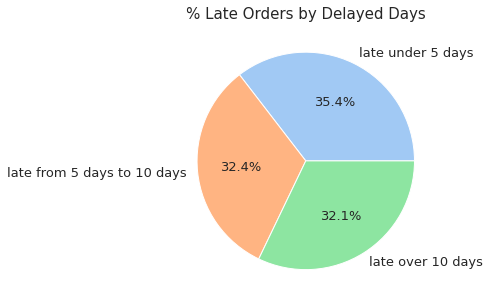

In [ ]:
###create df of late deliver orders only ###
late_deliver_df=deliver_df[deliver_df['est_to_deliver']=='late deliver']
late_deli_status=late_deliver_df.pivot_table(values='order_id',index='est_to_deliver_detail', aggfunc='nunique')
late_deli_status.sort_values(by='order_id', ascending=False, inplace=True)

# present data to chart:
late_deli_status.plot.pie(y='order_id', labels=late_deli_status.index, autopct='%1.1f%%',textprops={'fontsize': 13},figsize=(5, 5))
plt.title('% Late Orders by Delayed Days', size = 15)
plt.ylabel('')
plt.legend('')
plt.savefig('Late Orders by Delayed Days', dpi=400, bbox_inches='tight');

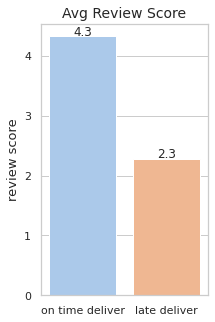

In [ ]:
###avg reviews score by deliver status###

#select rows not nan in review score and get unique lines by order:
review_score_not_nan = deliver_df[~deliver_df['review_score'].isna()]
uni_review = review_score_not_nan[['order_id','est_to_deliver','review_score']].drop_duplicates()

#create pivot table to get the avg review score of in time delivered orders vs late deliver
uni_review_pv = uni_review.pivot_table(values='review_score', index='est_to_deliver', aggfunc='mean')
uni_review_pv.sort_values(by=['review_score'], ascending=False, inplace=True)

# present data to chart:
fig, ax = plt.subplots(1,1, figsize=(3,5))
ax = sns.barplot(x=uni_review_pv.index, y='review_score', data=uni_review_pv)
ax.set(title="Avg Review Score", xlabel=None, ylabel="review score")


#annotation value in columns:
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
format_chart(ax)
plt.savefig('Avg Review Score', dpi=400, bbox_inches='tight');

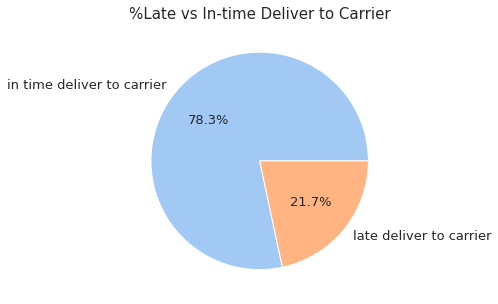

In [ ]:
###Percentage of late deliver to carrier###

#count unique orders by "est_to_deliver" = "late deliver"
late_deliver=late_deliver_df.pivot_table(values='order_id',index='est_to_deliver', aggfunc='nunique')
late_deliver.rename(columns={'order_id':'unique_orders'}, inplace=True)

#count unique orders by "seller_to_carrier"= "late deliver to carrier"
late_to_carrier=deliver_df[deliver_df['est_to_deliver']=='late deliver'].pivot_table(values='order_id',index='est_to_deliver', columns = 'seller_to_carrier', aggfunc='nunique')
deliver_to_carrier = late_deliver.merge(late_to_carrier, how = "left", on = 'est_to_deliver')

#1 order may have many different products delivered by different sellers to carrier,
#so if only 1 products late deliverd to carrier, we determined that order will be counted as late deliverd to carrier
#that is the reason why need to recalculate no of orders in time delivered to carrier = unique orders - late delivered to carrier orders
deliver_to_carrier.drop(columns='in time deliver to carrier')
deliver_to_carrier['in time deliver to carrier'] = deliver_to_carrier['unique_orders'] - deliver_to_carrier['late deliver to carrier']

deliver_to_carrier.drop(columns='unique_orders',inplace=True)
deli_to_carrier=deliver_to_carrier.T

# present data to chart:
deli_to_carrier.plot.pie(y='late deliver', labels=deli_to_carrier.index, autopct='%1.1f%%',textprops={'fontsize': 13},figsize=(5, 5))
plt.title('%Late vs In-time Deliver to Carrier', size = 15)
plt.ylabel('')
plt.legend('')
plt.savefig('%Late vs In-time Deliver to Carrier', dpi=400, bbox_inches='tight');

**Conclusion:**
* Olist has very good delivery performance with only 6.8% late delivery vs estimation. However, in the late delivered orders, over 60% of orders late delivered over 4 days vs estimation. 
* For review score: late deliver orders’ score is just 2.3 while earlier/in-time deliver orders has the score is 4.3. It is big gap.
* Dig down, for late delivery, only  21.7% orders is because sellers late delivered to carrier, nearly 80% come from carrier side to customer. 

=> When Olist business expanded, it is a need for them to care about late delivered orders and measure carefully their carrier’s partners to increase customer satisfaction.

### Red Flag for Late Deliver Seller

In [ ]:
### in all orders: which sellers most deliverPercentage of late orders per seller ###
#count unique orders by seller
seller=deliver_df[['seller_id','seller_to_carrier','order_id']]
seller_pv=seller.pivot_table(values='order_id',index='seller_id', aggfunc='nunique')
seller_pv.reset_index(inplace=True)
seller_pv.rename(columns={"order_id": "unique_order"}, inplace=True)

#count late orders by seller
seller_late_deliver=seller[seller.seller_to_carrier=='late deliver to carrier']
seller_late_deli = seller_late_deliver.drop_duplicates()
seller_late=seller_late_deli.pivot_table(values='order_id',index='seller_id', aggfunc='nunique')
seller_late.reset_index(inplace=True)
seller_late.rename(columns={"order_id": "late_order"}, inplace=True)

#calculate %late orders by seller
seller_summary=seller_pv.merge(seller_late, how="left", on='seller_id')
seller_summary.fillna(0, inplace=True)
seller_summary["percent_late_order"]=seller_summary.late_order*100/seller_summary.unique_order
seller_summary.sort_values("percent_late_order", ascending=False, inplace=True)
seller_summary.head(20)

#get avg orders per seller:
avg_ord_per_seller = pd.DataFrame(seller_pv.mean(numeric_only=True))
avg_ord_per_seller.reset_index(inplace=True)

#get seller with most %late order with 2 conditions: no of orders >= avg orders per seller & high %late orders:
seller_top=seller_summary[seller_summary['unique_order']>=avg_ord_per_seller.iloc[0,1]]
seller_top = seller_top.sort_values("percent_late_order", ascending=False)
seller_top_10 = seller_top.head(10)
seller_top_10.set_index('seller_id', inplace=True)

seller_top_10.columns.names = ['']
seller_top_styled = seller_top_10.style.background_gradient()
seller_top_styled

,unique_order,late_order,percent_late_order
seller_id,,,
48efc9d94a9834137efd9ea76b065a38,33,28.00,84.85
835f0f7810c76831d6c7d24c7a646d4d,41,30.00,73.17
a7f13822ceb966b076af67121f87b063,64,33.00,51.56
1da366cade6d8276e7d8beea7af5d4bf,37,18.00,48.65
54965bbe3e4f07ae045b90b0b8541f52,69,32.00,46.38
a49928bcdf77c55c6d6e05e09a9b4ca5,89,38.00,42.70
88460e8ebdecbfecb5f9601833981930,219,93.00,42.47
ad781527c93d00d89a11eecd9dcad7c1,38,16.00,42.11
834f8533b2ecb6598dd004ff3de7203a,38,13.00,34.21


**Conclusion:**

* Here is the id list of sellers that have highest percentage of late deliver orders. Olist needs to pay attention to these sellers if they want to increase customer satisfaction.
* Note: only consider no of orders >= avg orders per seller (31 orders within reported period) to reduce the low potential sellers



## **4. RFM Analysis**

In this section we will analyse customer behaviour by segmenting them based on the methodology of RFM.

**RFM (Recency, Frequency and Monetarity)**<br>



### Why RFM analysis should be done?

RFM segmentation will make you able to understand your customer base better, and also serve as a good starting point for your data journey and more advanced customer models. You will be able to give more accurate answers to key questions for your business — for example:

* Who are your best customers?
* Which customers are at the verge of churning?
* Who has the potential to be converted in more profitable customers
* Which customer are lost/inactive?
* Which customers is critical to retain?
* Who are your loyal customers?
* Which group of customers is most likely to respond to your current campaign?

### RFM Basics

RFM is a simple statistical method for categorising customers based on their purchasing behaviour. It is done in 3 steps

**STEP 1 - Calculating the value of each metrics - Recency, Frequency and Monetarity**<br>
The behaviour is identified by using only three customer data points:

1. Recency(R) - The freshness of customer activity - This is calculated for a customer by finding out `time or number of days since last purchase`
2. Frequency(F) - The frequency of customer transactions - This is calculated for a customer by finding out `total number of transactions`
3. Monetarity(M) - The willingness to spend - This is calculated by finding out `total transaction value`

For eg. Misa is a customer who has made the last purchase 7 days ago, the total number of transaction done by her is 100 and the totol transaction value is $1000, based on above information following RFM table or dataframe is built

| Customer     | Recency (R)  | Frequency (F) | Monetarity (M) |
|--------------|--------------|---------------|----------------|
|Misa          |       7      |     100       |     1000       |

**STEP 2 - Assigning a score for each metrics - R , F and M score**<br> 
Now that we have the values ​​of each of the RFM letters, it's time to assign a score . The score ranges from 1 to 5, where the higher this number, the better. This score is assigned to each of the letters, that is, R will have a score, F will have another and M too, which may or may not be the same — for example, all letters may receive a score of 5.

The scoring is usually done using the method of quantile based descritisation which will be shown later.

For eg. for Misa the scores after applying the quantile based descritisation the score might come like below

| Customer     | Recency (R)  | Frequency (F) | Monetarity (M) | R | F | M |
|--------------|--------------|---------------|----------------|---|---|---|
|Misa          |       7      |     100       |     1000       | 5 | 5 | 5 |


**STEP 3 - Segment the customer based on the score**<br>
Based on the scores `Mean of F and M score` and separate `R score` the customer can be divided into following segments

| Segment Name               | Range of R values | Range of F and M Average |
|----------------------------|-------------------|--------------------------|
| Champions                  |       4 - 5       |           4 - 5          |
| Loyal Customers            |       2 - 5       |           3 - 5          |
| Potential Loyalist         |       3 - 5       |           1 - 3          |
| New Customers              |       4 - 5       |           0 - 1          |
| Promising                  |       3 - 4       |           0 - 1          |
| Customers Needing Attetion |       2 - 3       |           2 - 3          |
| About to Sleep             |       2 - 3       |           0 - 2          |
| At Risk                    |       0 - 2       |           2 - 5          |
| Can't Lose Them            |       0 - 1       |           4 - 5          |
| Hibernating                |       1 - 2       |           1 - 2          |
| Lost                       |       0 - 2       |           0 - 2          |

The meaning of each segment is shown below<br>
**Champions:** These are customers who have bought recently, buy often, and spend a lot.

**Loyal Customers:** These are customers who spend well and often.

**Potential Loyalist:** These are recent buyers, spend a good amount and have bought more than once.

**New Customer:** These are customer who have bought recently but they are new so their spending is less and have bought very less.

**Promising:** These are customer who have bought recently but not as recently as new customer and their spending is less and have bought very less.

**Customer Needing Attetion:** These are customers who have recently purchased, however are still in doubt whether they will make their next purchase from the company or a competitor.

**About to Sleep:** These are customers who haven't bought in a long time, but may still buy again.

**At Risk:** These are customers who have spent very little money and buy frequently, but have not bought for a long time

**Can't lose them:** Used to purchase frequently but haven’t returned for a long time.

**Hibernating:** These are customers who have bought a long time ago, only a few times and have spent little

**Lost:** These are customers who have bought a long time ago, only a few times and have spent even more little than hibernating customers. 

For eg. based on Misa's score she belongs to Champions category

| Customer     | Recency (R)  | Frequency (F) | Monetarity (M) | R | F | M |FM-mean| Segment |
|--------------|--------------|---------------|----------------|---|---|---|-------|---------|
|Misa          |       7      |     100       |     1000       | 5 | 5 | 5 | 5      |Champions|


After segmenting we will propose possible CRM (customer relationshop management) strategy for each segment of customer. CRM strategy is nothing but what kind of sales strategy we can apply to retain customers.

For eg. for Misa we should be rewarding her by more offers and ask for her reviews which could help us to get more customer later on.

### RFM calculation

#### Preparing the data

We already have the products_df dataset with all the columns available below

In [ ]:
products_df.head()

,order_id,product_id,price,order_status,purchase_date,purchase_MMYYYY,purchase_year,purchase_month,purchase_day,purchase_time,...,order_delivered_carrier_date,shipping_limit_date,seller_id,delivered_days,days_est_vs_deliver,days_limit_vs_deliver_carrier,seller_to_carrier,est_to_deliver,est_to_deliver_detail,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,delivered,2017-09-13,Sep-17,2017,9,Wednesday,Morning,...,2017-09-19,2017-09-19,48436dade18ac8b2bce089ec2a041202,7.0,9.0,0.0,in time deliver to carrier,on time deliver,on time deliver,5.0
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,delivered,2017-04-26,Apr-17,2017,4,Wednesday,Morning,...,2017-05-04,2017-05-03,dd7ddc04e1b6c2c614352b383efe2d36,16.0,3.0,-1.0,late deliver to carrier,on time deliver,on time deliver,4.0
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,delivered,2018-01-14,Jan-18,2018,1,Sunday,Afternoon,...,2018-01-16,2018-01-18,5b51032eddd242adc84c38acab88f23d,8.0,14.0,2.0,in time deliver to carrier,on time deliver,on time deliver,5.0
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,delivered,2018-08-08,Aug-18,2018,8,Wednesday,Morning,...,2018-08-10,2018-08-15,9d7a1d34a5052409006425275ba1c2b4,6.0,6.0,5.0,in time deliver to carrier,on time deliver,on time deliver,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,delivered,2017-02-04,Feb-17,2017,2,Saturday,Afternoon,...,2017-02-16,2017-02-13,df560393f3a51e74553ab94004ba5c87,25.0,16.0,-3.0,late deliver to carrier,on time deliver,on time deliver,5.0


In [ ]:
products_df.columns

Index(['order_id', 'product_id', 'price', 'order_status', 'purchase_date',
       'purchase_MMYYYY', 'purchase_year', 'purchase_month', 'purchase_day',
       'purchase_time', 'weekday', 'product_category_name_english',
       'customer_unique_id', 'customer_state', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_delivered_carrier_date',
       'shipping_limit_date', 'seller_id', 'delivered_days',
       'days_est_vs_deliver', 'days_limit_vs_deliver_carrier',
       'seller_to_carrier', 'est_to_deliver', 'est_to_deliver_detail',
       'review_score'],
      dtype='object')

For RFM analysis, we will use the following columns
1. customer_unique_id - to identify each customer
2. price - to calculate monetarity value
3. purchase_date - to calculate recency value
2. order_id - to calculate frequency of purchase for each customers



In [ ]:
rfm_pre_data = products_df[['customer_unique_id','price','purchase_date','order_id']]
rfm_pre_data

,customer_unique_id,price,purchase_date,order_id
0,871766c5855e863f6eccc05f988b23cb,58.90,2017-09-13,00010242fe8c5a6d1ba2dd792cb16214
1,eb28e67c4c0b83846050ddfb8a35d051,239.90,2017-04-26,00018f77f2f0320c557190d7a144bdd3
2,3818d81c6709e39d06b2738a8d3a2474,199.00,2018-01-14,000229ec398224ef6ca0657da4fc703e
3,af861d436cfc08b2c2ddefd0ba074622,12.99,2018-08-08,00024acbcdf0a6daa1e931b038114c75
4,64b576fb70d441e8f1b2d7d446e483c5,199.90,2017-02-04,00042b26cf59d7ce69dfabb4e55b4fd9
...,...,...,...,...
110192,0c9aeda10a71f369396d0c04dce13a64,299.99,2018-04-23,fffc94f6ce00a00581880bf54a75a037
110193,0da9fe112eae0c74d3ba1fe16de0988b,350.00,2018-07-14,fffcd46ef2263f404302a634eb57f7eb
110194,cd79b407828f02fdbba457111c38e4c4,99.90,2017-10-23,fffce4705a9662cd70adb13d4a31832d
110195,eb803377c9315b564bdedad672039306,55.99,2017-08-14,fffe18544ffabc95dfada21779c9644f


#### Step 1 - calculating RFM values

Now we will calculate the values for Recency, Frequency and Monetarity using the groupby operation on customer unique id column.

* Monetarity - sum of price column for each customer
* Frequency - count of unique order_id per customer
* Recency - Difference between date of cusotmer's last purchase (this is basically the maximum purchase date per customer) and Maximum date of the dataset

Maximum date of the dataset - the most recent purchase plus 1 day

In [ ]:
max(rfm_pre_data['purchase_date'])

datetime.date(2018, 8, 29)

In [ ]:
import datetime
max_date = max(rfm_pre_data['purchase_date']) + datetime.timedelta(days=1)

We can calculate recency and monetarity using rfm_predata as shown below

In [ ]:
rec_mon_data = rfm_pre_data.groupby('customer_unique_id').agg({
    'purchase_date': lambda x: (max_date - x.max()).days,
    'price':'sum'
}).reset_index()

rec_mon_data

,customer_unique_id,purchase_date,price
0,0000366f3b9a7992bf8c76cfdf3221e2,112,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,18.90
2,0000f46a3911fa3c0805444483337064,538,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,322,25.99
4,0004aac84e0df4da2b147fca70cf8255,289,180.00
...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,448,1570.00
93354,fffea47cd6d3cc0a88bd621562a9d061,263,64.89
93355,ffff371b4d645b6ecea244b27531430a,569,89.90
93356,ffff5962728ec6157033ef9805bacc48,120,115.00


In [ ]:
rec_mon_data.columns =['customer_unique_id','recency','monetarity']

In [ ]:
rec_mon_data

,customer_unique_id,recency,monetarity
0,0000366f3b9a7992bf8c76cfdf3221e2,112,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,18.90
2,0000f46a3911fa3c0805444483337064,538,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,322,25.99
4,0004aac84e0df4da2b147fca70cf8255,289,180.00
...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,448,1570.00
93354,fffea47cd6d3cc0a88bd621562a9d061,263,64.89
93355,ffff371b4d645b6ecea244b27531430a,569,89.90
93356,ffff5962728ec6157033ef9805bacc48,120,115.00


The calculation of frquency or number of purchases per customer_unique_id needs understanding of below Note

Note:<br>
* Since multiple items were purchased on one order_id, so when all the orders and order_items datasets were merged the same order_id would be repeated multiple times. 
* When this merged dataset was merged with customers dataset then the same order_id will be repeated for each customer_unique_id. 
* This means that when calculating number of purchases by each customer just counting the number of order_id would not be enough becuase the same order_id will be repeated multiple times for each customer. 
* We actually need number of unique order_id per customer to calculate number of purchases or frequency

We will achieve the above task by just taking the customer_unique_id and order_id columns and then drop_duplicate rows so that we will get only single order_id and customer_unique_id mapping. 

In [ ]:
rfm_freq_data = rfm_pre_data[['customer_unique_id','order_id']]
rfm_freq_data.shape

(110197, 2)

In [ ]:
rfm_freq_data_uni = rfm_freq_data.drop_duplicates()
rfm_freq_data_uni.shape

(96478, 2)

So you can see from above that order_id were repeated for each customer_unique_id and by doing de-duplication we got unique pairs of order_id and customer_unique_id

In [ ]:
rfm_freq = rfm_freq_data_uni.groupby('customer_unique_id')['order_id'].count().reset_index()
rfm_freq

,customer_unique_id,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,1
93354,fffea47cd6d3cc0a88bd621562a9d061,1
93355,ffff371b4d645b6ecea244b27531430a,1
93356,ffff5962728ec6157033ef9805bacc48,1


In [ ]:
rfm_freq.columns = ['customer_unique_id','frequency']
rfm_freq

,customer_unique_id,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,1
93354,fffea47cd6d3cc0a88bd621562a9d061,1
93355,ffff371b4d645b6ecea244b27531430a,1
93356,ffff5962728ec6157033ef9805bacc48,1


Now we will combine rfm_freq and rec_mon_data

In [ ]:
rfm_data = rfm_freq.merge(rec_mon_data, on = 'customer_unique_id',how='inner')
rfm_data

,customer_unique_id,frequency,recency,monetarity
0,0000366f3b9a7992bf8c76cfdf3221e2,1,112,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,115,18.90
2,0000f46a3911fa3c0805444483337064,1,538,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,1,322,25.99
4,0004aac84e0df4da2b147fca70cf8255,1,289,180.00
...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,1,448,1570.00
93354,fffea47cd6d3cc0a88bd621562a9d061,1,263,64.89
93355,ffff371b4d645b6ecea244b27531430a,1,569,89.90
93356,ffff5962728ec6157033ef9805bacc48,1,120,115.00


Before calculating the RFM scores we will analyse the distribution of Frequency, Recency and Monetarity

In [ ]:
rfm_data.describe()

,frequency,recency,monetarity
count,93358.00,93358.00,93358.00
mean,1.03,238.48,141.62
std,0.21,152.60,215.69
min,1.00,1.00,0.85
25%,1.00,115.00,47.65
50%,1.00,219.00,89.73
75%,1.00,347.00,154.74
max,15.00,714.00,13440.00


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


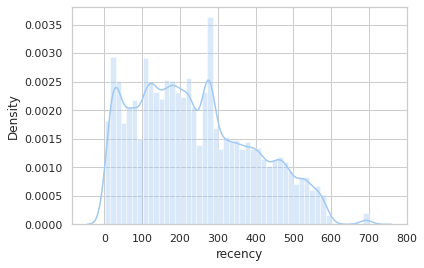

In [ ]:
sns.distplot(rfm_data['recency'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


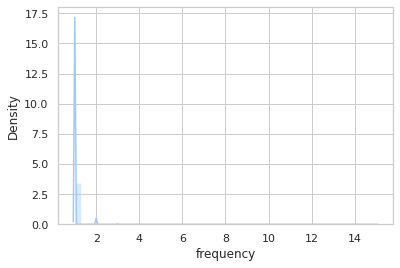

In [ ]:
sns.distplot(rfm_data['frequency'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


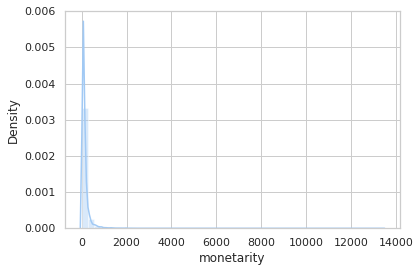

In [ ]:
sns.distplot(rfm_data['monetarity'])

In [ ]:
# number of customer who made more than one purchase
print(rfm_data[rfm_data['frequency']>1].shape[0] / rfm_data.shape[0])

0.03000278497825575


Conclusion:<br>
* the frequency of customers is the big problem for the in RFM analysis, because only 3% of customers made more than one purchase but is something that's very common in ecommerce in real life.
* An average monetary customer is R\$141 and 75% of the customers spend less than R\$154 and the maximum was R\\$13440.
* we can see the 25% of customers have a recency of 3.9 months (or 115 days) with an average of 8 months(or 238 days). With a purchase frequency equivalent to 1 and with this recency this indicates that customers make very specific purchases.



#### Step 2 - Assigning RFM scores

Now we will assign the score of 1-5 for each metric.

Higher the score the better the metric.

The score will be done based on quantile based descritisation technique.

Let's try to understand it through an example.

Let's suppose wee have 10 customer with following monetarity values

| cust_id | monetarity |
|---------|------------|
|  1      |    10      |
|  2      |    20      |
|  3      |    30      |
|  4      |    40      |
|  5      |    50      |
|  6      |    60      |
|  7      |    70      |
|  8      |    80      |
|  9      |    90      |
| 10      |   100      |

We will first sort the data based on monetarity value (this is already done above) and then create 5 equal buckets based on the calculation of percentiles from monetarity data. 

So there will be 5 percentile buckets with equal customer in each. 1st percentile bucket will be from 0 percentile to 20 percentile and will contain customer 1 and 2. This will be done for each customer.

The bucket with lowest monetarity values will be given score 1 and the highest one will be given 5

| cust_id | monetarity | M |
|---------|------------|---|
|  1      |    10      | 1 |
|  2      |    20      | 1 |
|  3      |    30      | 2 |
|  4      |    40      | 2 |
|  5      |    50      | 3 |
|  6      |    60      | 3 |
|  7      |    70      | 4 |
|  8      |    80      | 4 |
|  9      |    90      | 5 |
| 10      |   100      | 5 |




**Calculate the R score**<br>
For recency, customers with a lower recency are more valuable than those with a higher recency. For example, someone who shopped 7 days ago is far more likely to be a customer than someone last seen 1298 days ago. As a result, we score these differently to the frequency and monetary labels. To create five approximately equal segments of customers we’ll apply qcut() to the recency column and assign labels from 5 to 1.



In [ ]:
rfm_data['r'] = pd.qcut(rfm_data['recency'], q=5, labels=[5, 4, 3, 2, 1])

In [ ]:
rfm_data

,customer_unique_id,frequency,recency,monetarity,r
0,0000366f3b9a7992bf8c76cfdf3221e2,1,112,129.90,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,115,18.90,4
2,0000f46a3911fa3c0805444483337064,1,538,69.00,1
3,0000f6ccb0745a6a4b88665a16c9f078,1,322,25.99,2
4,0004aac84e0df4da2b147fca70cf8255,1,289,180.00,2
...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,1,448,1570.00,1
93354,fffea47cd6d3cc0a88bd621562a9d061,1,263,64.89,3
93355,ffff371b4d645b6ecea244b27531430a,1,569,89.90,1
93356,ffff5962728ec6157033ef9805bacc48,1,120,115.00,4


Let's try to check the distribution of r scores in each scoring category from 1 to 5

In [ ]:
rfm_data.groupby('r').agg(
    count=('customer_unique_id', 'count'),
    min_recency=('recency', min),
    max_recency=('recency', max),
    std_recency=('recency', 'std'),    
    avg_recency=('recency', 'mean')
).sort_values(by='avg_recency')

,count,min_recency,max_recency,std_recency,avg_recency
r,,,,,
5,18802,1,93,25.61,46.27
4,18757,94,178,23.81,136.64
3,18723,179,269,26.56,221.55
2,18471,270,383,34.70,317.37
1,18605,384,714,62.64,474.11


**Calculate the M scores**<br>
Since a higher monetary value is a better thing for the business, we score customers here from 1 to 5. Those who spend the most get a five and those who spend the least get a 1. We can use the same approach for qcut() and just switch the direction of the labels.


In [ ]:
rfm_data['m'] = pd.qcut(rfm_data['monetarity'], q=5, labels=[1, 2, 3, 4, 5])
rfm_data

,customer_unique_id,frequency,recency,monetarity,r,m
0,0000366f3b9a7992bf8c76cfdf3221e2,1,112,129.90,4,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,115,18.90,4,1
2,0000f46a3911fa3c0805444483337064,1,538,69.00,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,1,322,25.99,2,1
4,0004aac84e0df4da2b147fca70cf8255,1,289,180.00,2,5
...,...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,1,448,1570.00,1,5
93354,fffea47cd6d3cc0a88bd621562a9d061,1,263,64.89,3,2
93355,ffff371b4d645b6ecea244b27531430a,1,569,89.90,1,3
93356,ffff5962728ec6157033ef9805bacc48,1,120,115.00,4,4


Let's try to check the distribution of m scores in each scoring category from 1 to 5

In [ ]:
rfm_data.groupby('m').agg(
    count=('customer_unique_id', 'count'),
    min_monetary=('monetarity', min),
    max_monetary=('monetarity', max),
    std_monetary=('monetarity', 'std'),
    avg_monetary=('monetarity', 'mean')
).sort_values(by='avg_monetary')

,count,min_monetary,max_monetary,std_monetary,avg_monetary
m,,,,,
1,19336,0.85,39.9,8.51,26.08
2,19437,39.90,69.9,8.64,55.14
3,17451,69.94,109.9,11.20,90.17
4,18632,109.95,179.9,20.05,140.42
5,18502,179.91,13440.0,376.13,402.96


**Calculate the F scores**<br>


Using qcut() quantile-based discretization to create frequency scores is more challenging because the typical spread of order volumes means that bin edges may overlap. This is because 97% of customer have done only 1 purchase so dividing equal number of customer in 5 buckets will create overlap. 

If you experience this, qcut() will throw an error telling you “ValueError: Bin edges must be unique” and that you can “You can drop duplicate edges by setting the ‘duplicates’ kwarg”. You can avoid this by appending .rank(method='first').

In [ ]:
rfm_data['f'] = pd.qcut(rfm_data['frequency'], q=5, labels=[1, 2, 3, 4, 5])


ValueError: ignored

In [ ]:
rfm_data['f'] = pd.qcut(rfm_data['frequency'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])
rfm_data.head()

,customer_unique_id,frequency,recency,monetarity,r,m,f
0,0000366f3b9a7992bf8c76cfdf3221e2,1,112,129.90,4,4,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,115,18.90,4,1,1
2,0000f46a3911fa3c0805444483337064,1,538,69.00,1,2,1
3,0000f6ccb0745a6a4b88665a16c9f078,1,322,25.99,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,1,289,180.00,2,5,1


Since frequency data is skewed, so quantile based discretisation gives you lovely equal group sizes, but the scores don’t make a lot of sense because the frequency is heavily skewed resulting in a really long and quite useless tail.



We can observe this by checking the distribution of f scores in each scoring category from 1 to 5

In [ ]:
rfm_data.groupby('f').agg(
    count=('customer_unique_id', 'count'),
    min_frequency=('frequency', min),
    max_frequency=('frequency', max),
    std_frequency=('frequency', 'std'),
    avg_frequency=('frequency', 'mean')
).sort_values(by='avg_frequency')

,count,min_frequency,max_frequency,std_frequency,avg_frequency
f,,,,,
1,18672,1,1,0.00,1.00
2,18671,1,1,0.00,1.00
3,18672,1,1,0.00,1.00
4,18671,1,1,0.00,1.00
5,18672,1,15,0.44,1.17


Finally all the scores are concatenated to form an aggregate score called `rfm` score.


In [ ]:
rfm_data['rfm'] = rfm_data['r'].astype(str) +\
                      rfm_data['f'].astype(str) +\
                      rfm_data['m'].astype(str)

rfm_data

,customer_unique_id,frequency,recency,monetarity,r,m,f,rfm
0,0000366f3b9a7992bf8c76cfdf3221e2,1,112,129.90,4,4,1,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,115,18.90,4,1,1,411
2,0000f46a3911fa3c0805444483337064,1,538,69.00,1,2,1,112
3,0000f6ccb0745a6a4b88665a16c9f078,1,322,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,1,289,180.00,2,5,1,215
...,...,...,...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,1,448,1570.00,1,5,5,155
93354,fffea47cd6d3cc0a88bd621562a9d061,1,263,64.89,3,2,5,352
93355,ffff371b4d645b6ecea244b27531430a,1,569,89.90,1,3,5,153
93356,ffff5962728ec6157033ef9805bacc48,1,120,115.00,4,4,5,454


Now the customer with the aggregate score of `555` is the best customer.

#### Step 3 - Segmenting customers

Now we will use the below function to segment our customer into 11 categories as taught in RFM basics section.

In [ ]:
def get_segment(data):
    mean_fm = (data['f'] + data['m']) / 2
    
    if (data['r'] >= 4 and data['r'] <= 5) and (mean_fm >= 4 and mean_fm <= 5):
        return 'Champions'
    if (data['r'] >= 2 and data['r'] <= 5) and (mean_fm >= 3 and mean_fm <= 5):
        return 'Loyal Customers'
    if (data['r'] >= 3 and data['r'] <= 5) and (mean_fm >= 1 and mean_fm <= 3):
        return 'Potential Loyslist'
    if (data['r'] >= 4 and data['r'] <= 5) and (mean_fm >= 0 and mean_fm <= 1):
        return 'New Customers'
    if (data['r'] >= 3 and data['r'] <= 4) and (mean_fm >= 0 and mean_fm <= 1):
        return 'Promising'
    if (data['r'] >= 2 and data['r'] <= 3) and (mean_fm >= 2 and mean_fm <= 3):
        return 'Customer Needing Attention'
    if (data['r'] >= 2 and data['r'] <= 3) and (mean_fm >= 0 and mean_fm <= 2):
        return 'About to Sleep'
    if (data['r'] >= 0 and data['r'] <= 2) and (mean_fm >= 2 and mean_fm <= 5):
        return 'At Risk'
    if (data['r'] >= 0 and data['r'] <= 1) and (mean_fm >= 4 and mean_fm <= 5):
        return "Can't Lose Then"
    if (data['r'] >= 1 and data['r'] <= 2) and (mean_fm >= 1 and mean_fm <= 2):
        return 'Hibernating'
    return 'Lost'

In [ ]:
rfm_data['segment'] = rfm_data.apply(get_segment,axis=1)

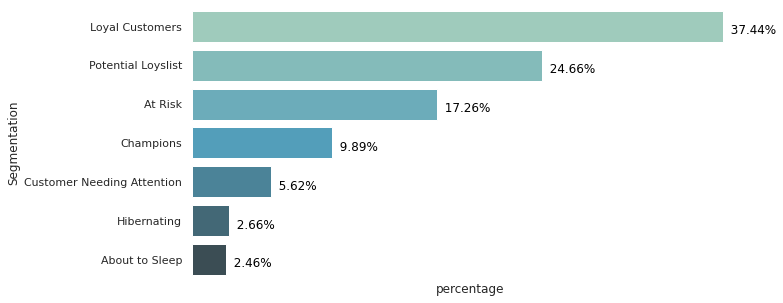

In [ ]:
plt.figure(figsize=(10,5))
percentage = (rfm_data['segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
g = sns.barplot(x=percentage['percentage'],y=percentage['index'], data=percentage,palette="GnBu_d")
sns.despine(bottom = True, left = True)
for i, v in enumerate(percentage['percentage']):
    g.text(v,i+0.20,"  {:.2f}".format(v)+"%", color='black', ha="left")
g.set_ylabel('Segmentation')
g.set(xticks=[])
plt.show()

### CRM strategy for different customer segments

**24.66% - Potential Loyslist:**

These are recent buyers, spend a good amount and have bought more than once.

<u>CRM Strategy</u>:

* Offer a loyalty program;
* Keep them engaged;
* Personalized and other product recommendations.

**2.46% - About to Sleep:**

These are customers who haven't bought in a long time, but may still buy again.

<u>CRM Strategy</u>:

* Offer discounts;
* Recommendation of popular products.

**2.66% - Hibernating:**

These are customers who have bought a long time ago, only a few times and have spent little

<u>CRM Strategy</u>:

* Standard communication for sending offers;
* Offer relevant products and good deals.

**5.62% - Customer Needing Attetion:**

These are customers who have recently purchased, however are still in doubt whether they will make their next purchase from the company or a competitor.

<u>CRM Strategy</u>:

* Promotional campaigns for a limited time;
* Product recommendations based on their behavior;
* Show the importance of buying with the company.

**17.26% - At Risk:**

These are customers who have spent very little money and buy frequently, but have not bought for a long time

<u>CRM Strategy</u>:

* Send personalized communications and other messages to reconnect;
* Offer good deals.

**37.44% - Loyal Customers:**

These are customers who spend well and often.

<u>CRM Strategy</u>:

* Personalized communication;
* Avoid mass mailing of offers;
* Offer few products, but present products that they are likely to be interested in;
* Ask for product reviews.

**9.89% - Champions:**

These are customers who have bought recently, buy often, and spend a lot.

<u> CRM Strategy</u>:

* Special offers, products and discounts for these customers so they feel valued;
* Ask for reviews and feedbacks constantly;
* Avoid sending massive amounts of offers;
* Personalized communication;
* Give rewards.